# <b> Test Decision Tree Model 1 <b>

## <b> Decision Tree Model using using Age, Race, Sex, and Prior Arrests as Features <b>

Loading Dataset

In [941]:
# importing libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn import metrics
import seaborn as sns

In [942]:
# reading dataset using pandas
data = pd.read_csv(
    r'georgia_rec_clean.csv')
# print data
data

,Supervision_Risk_Score_First,Prison_Offense,Gender,Race,Age_At_Release,Education_Level,Dependents,Prior_Arrest_Episodes_Misd,Prior_Arrest_Episodes_Violent,Prior_Conviction_Episodes_Felony,...,Prior_Conviction_Episodes_Drug,Prior_Arrest_Episodes_GunCharges,Prior_Conviction_Episodes_Viol,Prior_Conviction_Episodes_PPViolationCharges,Prior_Conviction_Episodes_DomesticViolenceCharges,Recidivism_Within_3years,Prior_Arrest_Episodes_Felony,Prior_Arrest_Episodes_Property,Prior_Arrest_Episodes_Drug,Prior_Conviction_Episodes_Prop
0,3.0000,0.0000,1.0000,0.0000,5.0000,0.0000,3.0000,6.0000,1.0000,3.0000,...,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,7.0000,3.0000,3.0000,2.0000
1,6.0000,3.0000,1.0000,0.0000,3.0000,2.0000,1.0000,6.0000,3.0000,3.0000,...,2.0000,0.0000,1.0000,1.0000,1.0000,1.0000,8.0000,0.0000,3.0000,0.0000
2,7.0000,0.0000,1.0000,0.0000,6.0000,0.0000,3.0000,6.0000,3.0000,3.0000,...,2.0000,0.0000,1.0000,0.0000,1.0000,1.0000,7.0000,2.0000,2.0000,1.0000
3,7.0000,2.0000,1.0000,1.0000,4.0000,2.0000,1.0000,6.0000,0.0000,3.0000,...,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,9.0000,3.0000,3.0000,3.0000
4,4.0000,3.0000,1.0000,1.0000,3.0000,2.0000,3.0000,4.0000,3.0000,1.0000,...,1.0000,0.0000,1.0000,0.0000,0.0000,1.0000,5.0000,2.0000,1.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25830,5.0000,5.0000,1.0000,0.0000,1.0000,0.0000,1.0000,2.0000,2.0000,0.0000,...,0.0000,0.0000,1.0000,0.0000,1.0000,1.0000,3.0000,0.0000,0.0000,0.0000
25831,5.0000,5.0000,1.0000,1.0000,4.0000,0.0000,3.0000,2.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000
25832,5.0000,5.0000,1.0000,0.0000,3.0000,0.0000,3.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000
25833,5.0000,5.0000,0.0000,1.0000,3.0000,0.0000,3.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Remove Null from Dataset

In [943]:
# checking for null values
data.isnull()

,Supervision_Risk_Score_First,Prison_Offense,Gender,Race,Age_At_Release,Education_Level,Dependents,Prior_Arrest_Episodes_Misd,Prior_Arrest_Episodes_Violent,Prior_Conviction_Episodes_Felony,...,Prior_Conviction_Episodes_Drug,Prior_Arrest_Episodes_GunCharges,Prior_Conviction_Episodes_Viol,Prior_Conviction_Episodes_PPViolationCharges,Prior_Conviction_Episodes_DomesticViolenceCharges,Recidivism_Within_3years,Prior_Arrest_Episodes_Felony,Prior_Arrest_Episodes_Property,Prior_Arrest_Episodes_Drug,Prior_Conviction_Episodes_Prop
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25830,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
25831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
25832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
25833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [944]:
# checking for nan
data.isnull().any()

Supervision_Risk_Score_First                         False
Prison_Offense                                       False
Gender                                               False
Race                                                 False
Age_At_Release                                       False
Education_Level                                      False
Dependents                                           False
Prior_Arrest_Episodes_Misd                           False
Prior_Arrest_Episodes_Violent                        False
Prior_Conviction_Episodes_Felony                     False
Prior_Conviction_Episodes_Misd                       False
Prior_Conviction_Episodes_Drug                       False
Prior_Arrest_Episodes_GunCharges                     False
Prior_Conviction_Episodes_Viol                       False
Prior_Conviction_Episodes_PPViolationCharges         False
Prior_Conviction_Episodes_DomesticViolenceCharges    False
Recidivism_Within_3years                             Fal

Estimate Correlation Coefficients

In [945]:
pd.options.display.float_format = '{:.4f}'.format
corr_matrix = data.corr()
corr_matrix

,Supervision_Risk_Score_First,Prison_Offense,Gender,Race,Age_At_Release,Education_Level,Dependents,Prior_Arrest_Episodes_Misd,Prior_Arrest_Episodes_Violent,Prior_Conviction_Episodes_Felony,...,Prior_Conviction_Episodes_Drug,Prior_Arrest_Episodes_GunCharges,Prior_Conviction_Episodes_Viol,Prior_Conviction_Episodes_PPViolationCharges,Prior_Conviction_Episodes_DomesticViolenceCharges,Recidivism_Within_3years,Prior_Arrest_Episodes_Felony,Prior_Arrest_Episodes_Property,Prior_Arrest_Episodes_Drug,Prior_Conviction_Episodes_Prop
Supervision_Risk_Score_First,1.0000,-0.0329,0.0040,-0.0355,-0.4531,0.1218,-0.1047,-0.0704,-0.0609,-0.0464,...,0.0341,0.0612,-0.0174,0.0019,-0.0231,0.1613,0.0831,0.0789,0.0102,0.0841
Prison_Offense,-0.0329,1.0000,0.0699,-0.0990,-0.0626,-0.0425,-0.0022,-0.1284,0.0678,-0.1075,...,-0.1973,-0.0187,0.1004,-0.0808,0.0028,-0.0237,-0.0648,-0.0672,-0.1820,-0.0560
Gender,0.0040,0.0699,1.0000,-0.1762,-0.0580,0.0898,-0.0268,0.0403,0.1346,0.0281,...,0.0486,0.1407,0.1077,0.0194,0.0666,0.0920,0.0100,-0.0519,0.0689,-0.0490
Race,-0.0355,-0.0990,-0.1762,1.0000,0.1201,-0.0619,-0.0849,0.0781,-0.1405,0.0163,...,0.0017,-0.1209,-0.1118,0.0443,0.0054,-0.0234,0.0412,0.0878,-0.0145,0.0847
Age_At_Release,-0.4531,-0.0626,-0.0580,0.1201,1.0000,-0.1533,0.1495,0.2729,0.1939,0.3989,...,0.1065,-0.0143,0.0975,0.2185,0.0270,-0.1776,-0.0973,0.2640,0.1559,0.2541
Education_Level,0.1218,-0.0425,0.0898,-0.0619,-0.1533,1.0000,-0.0974,0.0824,0.0821,0.0663,...,0.0743,0.0418,0.0586,0.0693,0.0349,0.0951,0.0894,0.0392,0.0614,0.0373
Dependents,-0.1047,-0.0022,-0.0268,-0.0849,0.1495,-0.0974,1.0000,0.0920,0.1011,0.0402,...,0.0406,0.0254,0.0537,0.0247,0.0770,-0.0318,-0.0049,-0.0201,0.0516,-0.0265
Prior_Arrest_Episodes_Misd,-0.0704,-0.1284,0.0403,0.0781,0.2729,0.0824,0.0920,1.0000,0.3290,0.4294,...,0.3164,0.0618,0.1725,0.4210,0.1987,0.1768,0.1161,0.4233,0.3883,0.3810
Prior_Arrest_Episodes_Violent,-0.0609,0.0678,0.1346,-0.1405,0.1939,0.0821,0.1011,0.3290,1.0000,0.2199,...,0.0124,0.1559,0.5959,0.1441,0.2964,0.0675,-0.0028,0.1170,0.0448,0.0940
Prior_Conviction_Episodes_Felony,-0.0464,-0.1075,0.0281,0.0163,0.3989,0.0663,0.0402,0.4294,0.2199,1.0000,...,0.3648,0.0608,0.1556,0.4387,0.0921,0.1054,0.0554,0.4681,0.3212,0.5291


In [946]:
# shows the relationship of all variables to Age_At_Release, where the top variables have strong correlation
corr_matrix['Age_At_Release'].sort_values(ascending=False)

Age_At_Release                                       1.0000
Prior_Conviction_Episodes_Felony                     0.3989
Prior_Arrest_Episodes_Misd                           0.2729
Prior_Arrest_Episodes_Property                       0.2640
Prior_Conviction_Episodes_Prop                       0.2541
Prior_Conviction_Episodes_Misd                       0.2469
Prior_Conviction_Episodes_PPViolationCharges         0.2185
Prior_Arrest_Episodes_Violent                        0.1939
Prior_Arrest_Episodes_Drug                           0.1559
Dependents                                           0.1495
Race                                                 0.1201
Prior_Conviction_Episodes_Drug                       0.1065
Prior_Conviction_Episodes_Viol                       0.0975
Prior_Conviction_Episodes_DomesticViolenceCharges    0.0270
Prior_Arrest_Episodes_GunCharges                    -0.0143
Gender                                              -0.0580
Prison_Offense                          

In [947]:
# shows the relationship of all variables to Race, where the top variables have strong correlation
corr_matrix['Race'].sort_values(ascending=False)

Race                                                 1.0000
Age_At_Release                                       0.1201
Prior_Arrest_Episodes_Property                       0.0878
Prior_Conviction_Episodes_Prop                       0.0847
Prior_Arrest_Episodes_Misd                           0.0781
Prior_Conviction_Episodes_Misd                       0.0543
Prior_Conviction_Episodes_PPViolationCharges         0.0443
Prior_Arrest_Episodes_Felony                         0.0412
Prior_Conviction_Episodes_Felony                     0.0163
Prior_Conviction_Episodes_DomesticViolenceCharges    0.0054
Prior_Conviction_Episodes_Drug                       0.0017
Prior_Arrest_Episodes_Drug                          -0.0145
Recidivism_Within_3years                            -0.0234
Supervision_Risk_Score_First                        -0.0355
Education_Level                                     -0.0619
Dependents                                          -0.0849
Prison_Offense                          

In [948]:
# shows the relationship of all variables to Education_Level, where the top variables have strong correlation
corr_matrix['Education_Level'].sort_values(ascending=False)

Education_Level                                      1.0000
Supervision_Risk_Score_First                         0.1218
Prior_Conviction_Episodes_Misd                       0.0965
Recidivism_Within_3years                             0.0951
Gender                                               0.0898
Prior_Arrest_Episodes_Felony                         0.0894
Prior_Arrest_Episodes_Misd                           0.0824
Prior_Arrest_Episodes_Violent                        0.0821
Prior_Conviction_Episodes_Drug                       0.0743
Prior_Conviction_Episodes_PPViolationCharges         0.0693
Prior_Conviction_Episodes_Felony                     0.0663
Prior_Arrest_Episodes_Drug                           0.0614
Prior_Conviction_Episodes_Viol                       0.0586
Prior_Arrest_Episodes_GunCharges                     0.0418
Prior_Arrest_Episodes_Property                       0.0392
Prior_Conviction_Episodes_Prop                       0.0373
Prior_Conviction_Episodes_DomesticViolen

Feature Selection

In [949]:
# print all columns
data.columns

Index(['Supervision_Risk_Score_First', 'Prison_Offense', 'Gender', 'Race',
       'Age_At_Release', 'Education_Level', 'Dependents',
       'Prior_Arrest_Episodes_Misd', 'Prior_Arrest_Episodes_Violent',
       'Prior_Conviction_Episodes_Felony', 'Prior_Conviction_Episodes_Misd',
       'Prior_Conviction_Episodes_Drug', 'Prior_Arrest_Episodes_GunCharges',
       'Prior_Conviction_Episodes_Viol',
       'Prior_Conviction_Episodes_PPViolationCharges',
       'Prior_Conviction_Episodes_DomesticViolenceCharges',
       'Recidivism_Within_3years', 'Prior_Arrest_Episodes_Felony',
       'Prior_Arrest_Episodes_Property', 'Prior_Arrest_Episodes_Drug',
       'Prior_Conviction_Episodes_Prop'],
      dtype='object')

In [950]:
# model1 independent variables
x_feature_cols_1 = ['Age_At_Release', 'Race', 'Gender', 'Supervision_Risk_Score_First','Prior_Arrest_Episodes_Violent', 
                    'Prior_Arrest_Episodes_GunCharges', 'Prior_Arrest_Episodes_Felony', 'Prior_Arrest_Episodes_Property', 
                    'Prior_Arrest_Episodes_Drug', 'Prior_Arrest_Episodes_Misd']
# model1 dependent variables
y_feature_cols_1 = ['Recidivism_Within_3years']

x1 = data[x_feature_cols_1]
y1 = data[y_feature_cols_1]

Splitting the Dataset

In [951]:
# split dataset to 20% test and 80% train in a random state
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2, random_state=5)

In [952]:
# print split dataset shapes
print("x_train : ",x_train1.shape)
print("x_test : ",x_test1.shape)
print("y_train : ",y_train1.shape)
print("y_test : ",y_test1.shape)

x_train :  (20668, 10)
x_test :  (5167, 10)
y_train :  (20668, 1)
y_test :  (5167, 1)


Build the Decision Tree Model

In [953]:
# decision tree parameters
model1 = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=5, random_state=5)
# train algorithm on training data
model1 = model1.fit(x_train1, y_train1)
# predict response
y_pred1 = model1.predict(x_test1)

Model Evaluation

In [954]:
# flatten array
y_test1 = y_test1.values.ravel()

In [955]:
# print accuracy score
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.6524095219663247


## Visualizing Decision Tree for Test Model 1

In [956]:
# required libraries for visualization
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from six import StringIO
from IPython.display import Image
import pydotplus

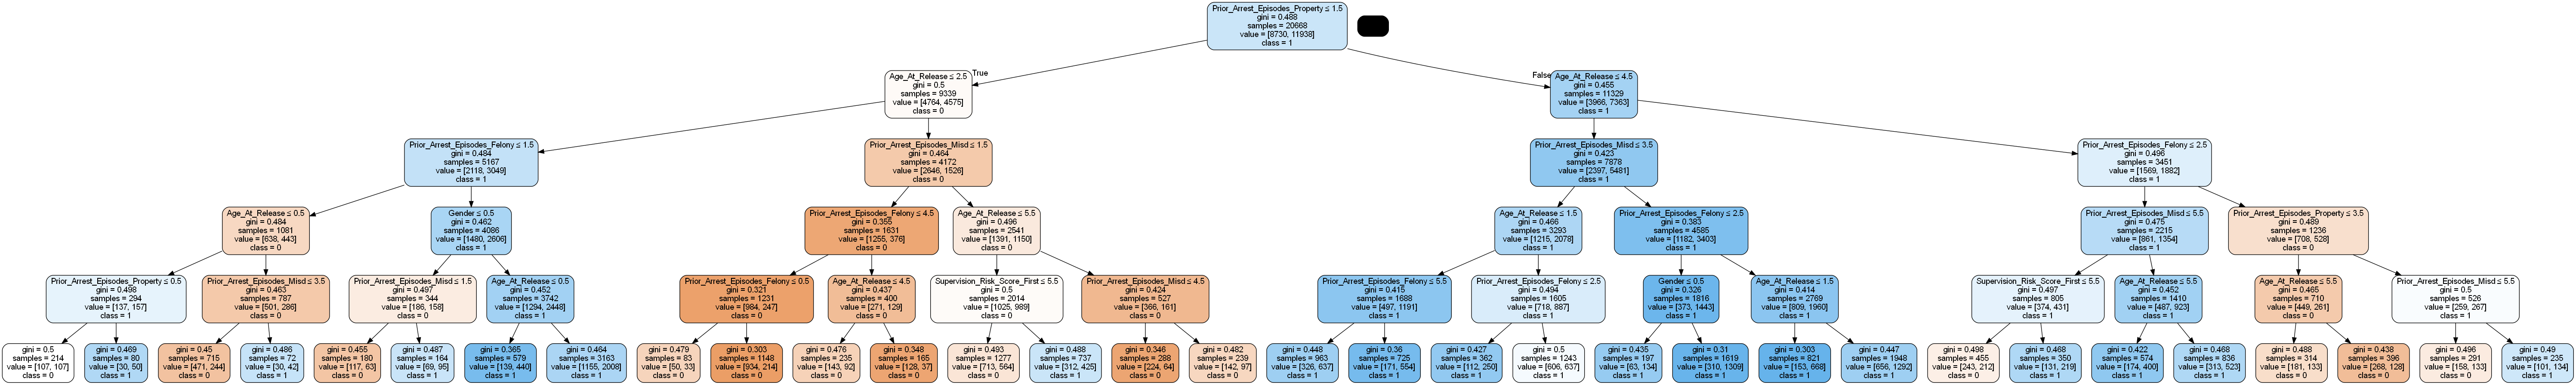

In [957]:
# convert decision tree classifier into dot file
dot_data = StringIO()
export_graphviz(model1, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=x_feature_cols_1, class_names=['0', '1'])
# pydotplus converts dot file to png
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('test_DT_model1.png')
Image(graph.create_png())

In [958]:
# create DT classifier object
model1 = DecisionTreeClassifier(criterion="gini", splitter='best',max_depth=4, random_state=5)
# DT classifier
model1 = model1.fit(x_train1,y_train1)
# predict the response
y_pred1 = model1.predict(x_test1)
# model accuracy
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.650280627056319


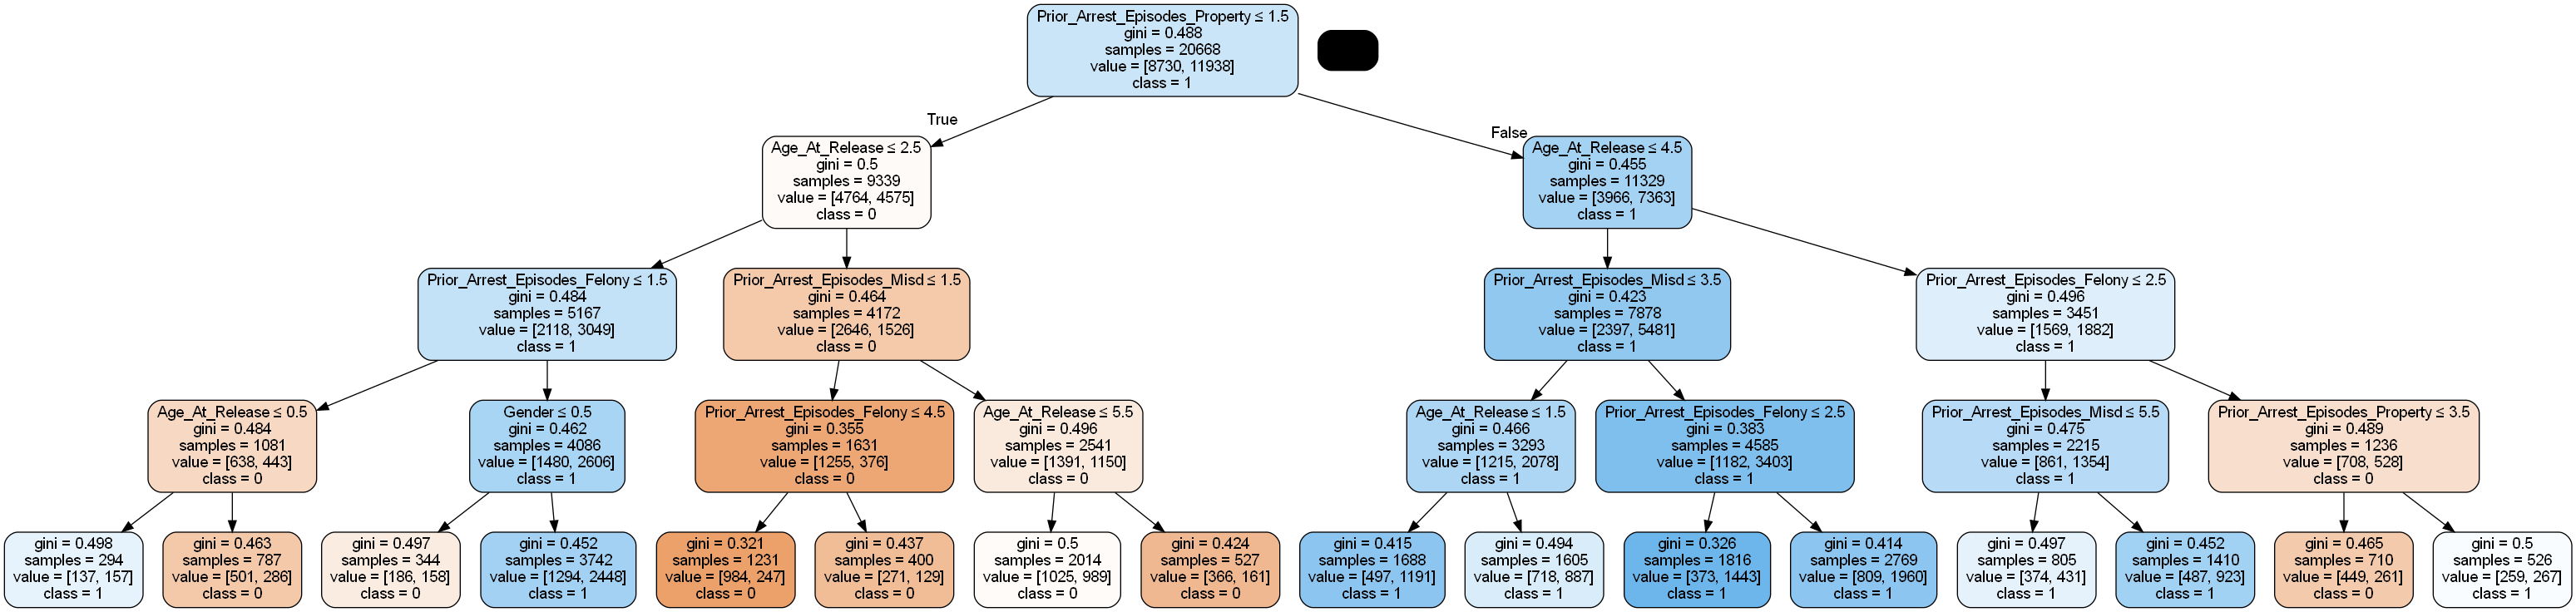

In [959]:
# convert decision tree classifier into dot file
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model1, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=x_feature_cols_1, class_names=['0', '1'])
# pydotplus converts dot file to png
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('test_DT_model1_2.png')
Image(graph.create_png())

Root Mean Square Error

In [960]:
from sklearn.metrics import mean_squared_error
rmse1 = mean_squared_error(y_test1, y_pred1)
# print rmse
rmse1

0.34971937294368105

In [961]:
# R2 scores values
from sklearn.metrics import r2_score
print("R2 Score Value: {:.2f}".format(r2_score(y_test1, y_pred1)))

R2 Score Value: -0.43


Overfitting vs Underfitting

In [962]:
print("Training set score: {:.4f}".format(model1.score(x_train1, y_train1)))
print("Test set score: {:.4f}".format(model1.score(x_test1, y_test1)))

Training set score: 0.6527
Test set score: 0.6503


Metrics Analysis

In [963]:
# required libraries for metrics analysis
from sklearn.metrics import confusion_matrix, classification_report
# getting predicted classes for test
y_pred1 = model1.predict(x_test1)

In [964]:
# calculate confusion matrix
conf_matrix1 = confusion_matrix(y_test1, y_pred1)
conf_matrix1

array([[ 903, 1298],
       [ 509, 2457]], dtype=int64)

In [965]:
class_report = classification_report(y_test1, y_pred1)
print(class_report)

              precision    recall  f1-score   support

         0.0       0.64      0.41      0.50      2201
         1.0       0.65      0.83      0.73      2966

    accuracy                           0.65      5167
   macro avg       0.65      0.62      0.62      5167
weighted avg       0.65      0.65      0.63      5167



# <b> Test Decision Tree Model 2 <b>

### <b> Decision Tree Model using using Age, Sex, and Prior Convictions as Features <b>

Feature Selection

In [966]:
x_feature_cols_2 = ['Age_At_Release', 'Gender', 'Prison_Offense', 'Supervision_Risk_Score_First',
                     'Prior_Conviction_Episodes_Felony', 'Prior_Conviction_Episodes_Misd','Prior_Conviction_Episodes_Drug',
                     'Prior_Conviction_Episodes_PPViolationCharges', 'Prior_Conviction_Episodes_DomesticViolenceCharges',
                     'Prior_Conviction_Episodes_Prop']
y_feature_cols_2 = ['Recidivism_Within_3years']

In [967]:
x2 = data[x_feature_cols_2]
y2 = data[y_feature_cols_2]

Splitting the Dataset

In [968]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state=5)

Building the Dataset

In [969]:
model2 = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=5, random_state=5)
model2 = model2.fit(x_train2, y_train2)
y_pred2 = model2.predict(x_test2)

Model Evaluation

In [970]:
y_test2 = y_test2.values.ravel()

In [971]:
print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.6411844397135669


## Visualizing Decision Tree for Model 2

In [972]:
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from six import StringIO
from IPython.display import Image
import pydotplus

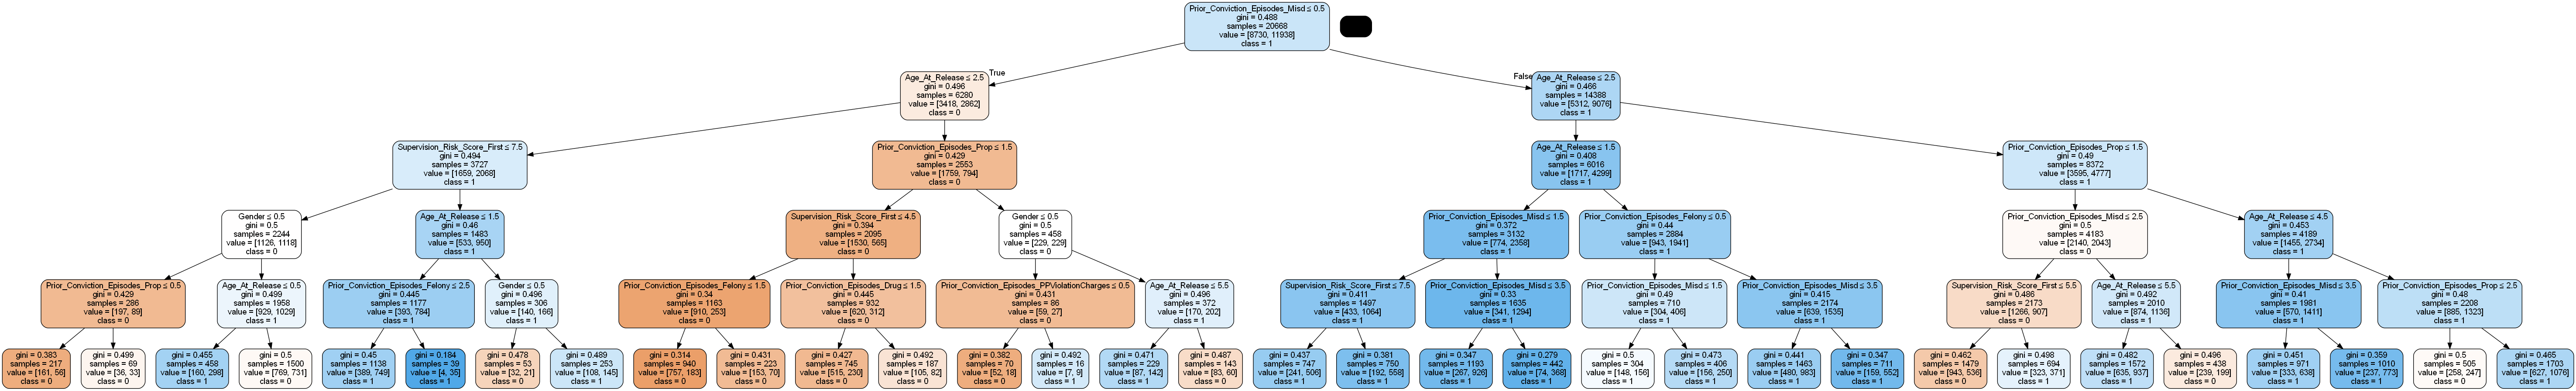

In [973]:
dot_data = StringIO()
export_graphviz(model2, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=x_feature_cols_2, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('test_DT_model2.png')
Image(graph.create_png())

Optimizing Decision Tree Performance

In [974]:
model2 = DecisionTreeClassifier(criterion="gini", splitter='best', max_depth=4)

model2 = model2.fit(x_train2,y_train2)

y_pred = model2.predict(x_test2)

print("Accuracy:",metrics.accuracy_score(y_test2, y_pred2))

Accuracy: 0.6411844397135669


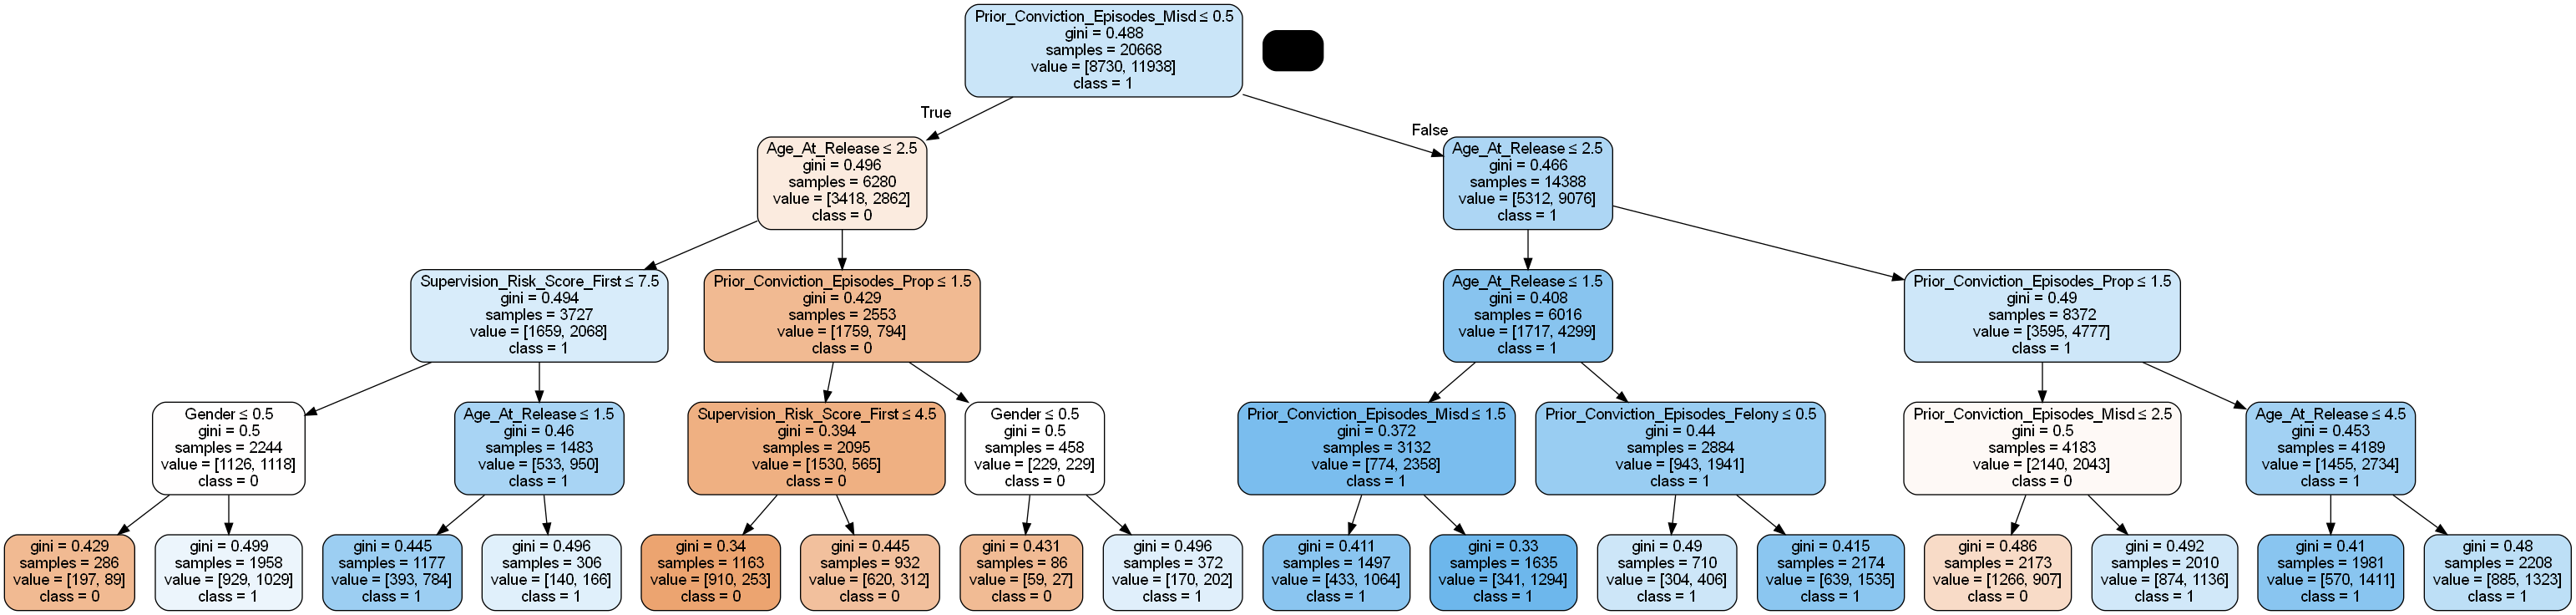

In [975]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model2, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=x_feature_cols_2, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('test_DT_model2_2.png')
Image(graph.create_png())

Root Mean Square Error

In [976]:
from sklearn.metrics import mean_squared_error
# print rmse
mse2 = mean_squared_error(y_test2, y_pred2)
mse2

0.35881556028643313

In [977]:
# R2 scores values
from sklearn.metrics import r2_score
print("R2 Score Value: {:.2f}".format(r2_score(y_test2, y_pred2)))

R2 Score Value: -0.47


Overfitting vs Underfitting

In [978]:
print("Training set score: {:.4f}".format(model2.score(x_train2, y_train2)))
print("Training set score: {:.4f}".format(model2.score(x_test2, y_test2)))

Training set score: 0.6484
Training set score: 0.6420


Metrics Analysis

In [979]:
# required libraries for metrics analysis
from sklearn.metrics import confusion_matrix, classification_report
# getting predicted classes for test
y_pred2 = model2.predict(x_test2)

In [980]:
# calculate confusion matrix
conf_matrix2 = confusion_matrix(y_test2, y_pred2)
conf_matrix2

array([[ 715, 1486],
       [ 364, 2602]], dtype=int64)

In [981]:
class_report = classification_report(y_test2, y_pred2)
print(class_report)

              precision    recall  f1-score   support

         0.0       0.66      0.32      0.44      2201
         1.0       0.64      0.88      0.74      2966

    accuracy                           0.64      5167
   macro avg       0.65      0.60      0.59      5167
weighted avg       0.65      0.64      0.61      5167

